In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
# given a function f, a system of ODE and a time interval [t0=0, t_max], find x(t_max)
# use scipy.integrate.solve_ivp

def f(t, x):
    # x is a vector of size n
    return x[1], -x[0]

x0 = [1.1, 2.1]
t_max = 2*np.pi

# solve the system of ODEs
t_eval = np.linspace(0, t_max, 100)
sol = sp.integrate.solve_ivp(f, [0, t_max], 
        x0, method='DOP853', t_eval=t_eval, 
        atol=1e-16, rtol=1e-16)

print(np.linalg.norm(sol.y[:, -1] - x0))
print(sol.y[:, -1], x0)

2.0906416366728584e-14
[1.1 2.1] [1.1, 2.1]


c:\Users\rannu\OneDrive - NTNU\Desktop\VsPython\ntnusession\lib\site-packages\scipy\integrate\_ivp\common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


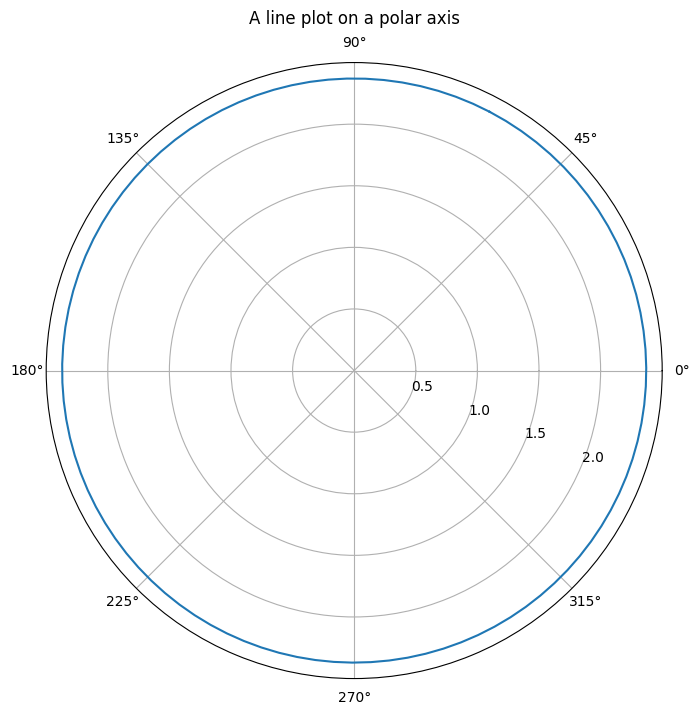

In [11]:
r = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
theta = np.arctan2(sol.y[1], sol.y[0])

# Making the plot look nice
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2.5)
ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line
ax.grid(True)
ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

In [5]:
def H(x):
    return 0.5*(x[0]**2 + x[1]**2)

tol = 1e-12

# Check if the hamiltonian remains constant for all points, by checking the error. break iff error > tol
for i in range(len(sol.t)):
    if abs(H(sol.y[:, i]) - H(x0)) > tol:
        print("Hamiltonian is not constant for all points. Error = ", abs(H(sol.y[:, i]) - H(x0)))
        print("Hamiltonian at x0 = ", H(x0))
        print("Hamiltonian at x = ", H(sol.y[:, i]))
        break




In [6]:
# Now, creating a more complex system of ODEs

def f(t, x):
    # x is a vector of size n
    return x[1], -x[0], x[4], x[5], -x[2], -x[3]

x0 = [1.1, 2.1, 1, 0 , 0, 1]
t_max = 2*np.pi

# solve the system of ODEs
t_eval = np.linspace(0, t_max, 100)
sol = sp.integrate.solve_ivp(f, [0, t_max], x0, method='DOP853', t_eval=t_eval, atol=1e-16, rtol=1e-16)

In [7]:
def H(x):
    return 0.5*(x[0]**2 + x[1]**2)

tol = 1e-12

# Check if the hamiltonian remains constant for all points, by checking the error. break iff error > tol
# Also chek the determinant of the matrix [[x3, x4], [x5, x6]]
for i in range(len(sol.t)):
    if abs(H(sol.y[:, i]) - H(x0)) > tol:
        print("Hamiltonian is not constant for all points. Error = ", abs(H(sol.y[:, i]) - H(x0)))
        print("Hamiltonian at x0 = ", H(x0))
        print("Hamiltonian at x = ", H(sol.y[:, i]))
        break
    if abs(sol.y[2, i]*sol.y[5, i] - sol.y[3, i]*sol.y[4, i]-1) > tol:
        print("Determinant of the matrix is not constant for all points. Error = ", abs(sol.y[2, i]*sol.y[5, i] - sol.y[3, i]*sol.y[4, i])-1)
        print("Determinant of the matrix at x0 = ", sol.y[2, 0]*sol.y[5, 0] - sol.y[3, 0]*sol.y[4, 0])
        print("Determinant of the matrix at x = ", sol.y[2, i]*sol.y[5, i] - sol.y[3, i]*sol.y[4, i])
        break

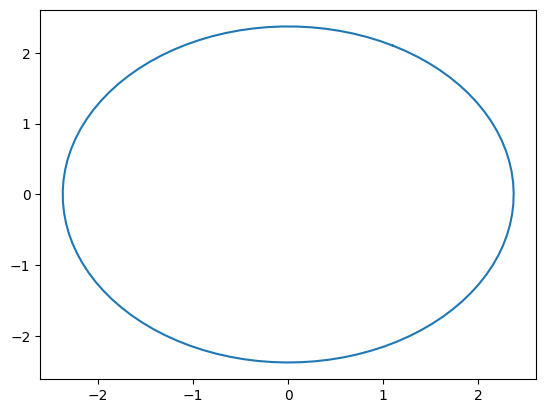

In [8]:
# Packaging this into a function


x0 = [1.1, 2.1, 1, 0 , 0, 1]
t_max = 2*np.pi

# solve the system of ODEs
t_eval = np.linspace(0, t_max, 100)

tol = 1e-12

sol = sp.integrate.solve_ivp(f, [0, t_max], x0, method='DOP853', t_eval=t_eval, atol=1e-16, rtol=1e-16)

def ODE_solver(func, hamiltonian, x0, t_max, eval_pts, tol = 1e-12, t_min = 0, method='DOP853'):
    # Variable explanation:
    # func: the function f in the system of ODEs
    # hamiltonian: the hamiltonian of the system
    # x0: the initial condition, a vector of size n
    # t_max: the maximum time
    # eval_pts: number of points at which the solution is evaluated
    # tol: tolerance for checking if the hamiltonian is constant
    # t_min: the minimum time
    # method: the method used to solve the system of ODEs

    t_eval = np.linspace(t_min, t_max, eval_pts)

    sol = sp.integrate.solve_ivp(func, [t_min, t_max], x0, method=method, t_eval=t_eval, atol=1e-16, rtol=1e-16)

    # Check if the hamiltonian remains constant for all points, by checking the error. break iff error > tol
    # Also chek the determinant of the matrix [[x3, x4], [x5, x6]]
    for i in range(len(sol.t)):
        if abs(hamiltonian(sol.y[:, i]) - hamiltonian(x0)) > tol:
            print("Hamiltonian is not constant for all points. Error = ", abs(hamiltonian(sol.y[:, i]) - hamiltonian(x0)))
            print("Hamiltonian at x0 = ", hamiltonian(x0))
            print("Hamiltonian at x = ", hamiltonian(sol.y[:, i]))
            break
        if abs(sol.y[2, i]*sol.y[5, i] - sol.y[3, i]*sol.y[4, i]-1) > tol:
            print("Determinant of the matrix is not constant for all points. Error = ", abs(sol.y[2, i]*sol.y[5, i] - sol.y[3, i]*sol.y[4, i])-1)
            print("Determinant of the matrix at x0 = ", sol.y[2, 0]*sol.y[5, 0] - sol.y[3, 0]*sol.y[4, 0])
            print("Determinant of the matrix at x = ", sol.y[2, i]*sol.y[5, i] - sol.y[3, i]*sol.y[4, i])
            break

    return sol

# Checking the function
x0 = [1.1, 2.1, 1, 0 , 0, 1]
t_max = 2*np.pi
eval_pts = 100

sol = ODE_solver(f, H, x0, t_max, eval_pts)

# Now, printing the solution
r = np.sqrt(sol.y[0]**2 + sol.y[1]**2)
theta = np.arctan2(sol.y[1], sol.y[0])

# now plot the points
plt.plot(r*np.cos(theta), r*np.sin(theta))
plt.show()
    
